In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

O crédito pode ser concedido ao cliente?

#Análise de Crédito

In [ ]:
df = pd.read_csv('/content/credit_train.csv')
df.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,3.902600e+04,31507.000000,3.150700e+04,39026.000000,39026.000000,18060.000000,39026.000000,39026.000000,3.902600e+04,3.902500e+04,38947.000000,39020.000000
mean,1.188499e+07,1074.992795,1.378275e+06,18497.259718,18.163665,34.966556,11.128965,0.167991,2.965295e+05,8.100623e+05,0.116825,0.029523
std,3.193204e+07,1472.333829,9.428632e+05,12303.138840,6.974511,22.053085,4.984121,0.488291,3.901686e+05,1.138986e+07,0.349323,0.267209
min,1.124200e+04,585.000000,9.703300e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.802955e+05,705.000000,8.509910e+05,10216.727500,13.500000,16.000000,8.000000,0.000000,1.132020e+05,2.752860e+05,0.000000,0.000000
50%,3.151500e+05,724.000000,1.168500e+06,16272.075000,16.900000,32.000000,10.000000,0.000000,2.108145e+05,4.694140e+05,0.000000,0.000000
75%,5.277140e+05,741.000000,1.646378e+06,24025.215000,21.600000,51.000000,14.000000,0.000000,3.691700e+05,7.864120e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,3.647544e+07,435843.280000,70.500000,176.000000,56.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


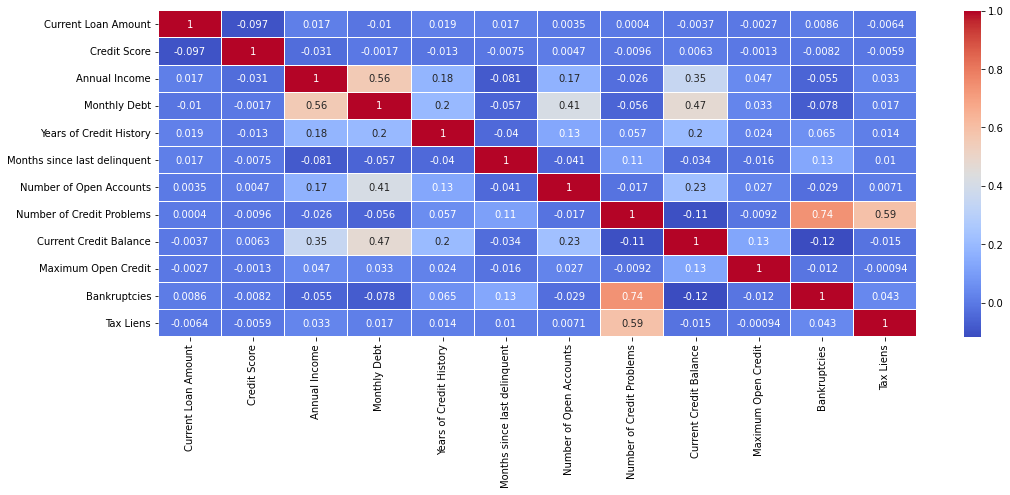

In [ ]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.01 ,cmap='coolwarm', cbar=True)
plt.show()

In [ ]:
features =['Number of Credit Problems','Bankruptcies','Tax Liens','Loan Status']
dfRisco = df[features]
dfRisco.head()

,Number of Credit Problems,Bankruptcies,Tax Liens,Loan Status
0,1.0,1.0,0.0,Fully Paid
1,0.0,0.0,0.0,Fully Paid
2,1.0,0.0,0.0,Fully Paid
3,0.0,0.0,0.0,Fully Paid
4,0.0,0.0,0.0,Fully Paid


In [ ]:
dfRisco.describe()

,Number of Credit Problems,Bankruptcies,Tax Liens
count,39026.000000,38947.000000,39020.000000
mean,0.167991,0.116825,0.029523
std,0.488291,0.349323,0.267209
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,15.000000,7.000000,15.000000


In [ ]:
dfRisco.isnull()

,Number of Credit Problems,Bankruptcies,Tax Liens,Loan Status
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
39022,False,False,False,False
39023,False,False,False,False
39024,False,False,False,False
39025,False,False,False,False


In [ ]:
dfRiscoLimpo = dfRisco[df['Number of Credit Problems'].notnull() & df['Bankruptcies'].notnull() & df['Tax Liens'].notnull() & df['Loan Status'].notnull()]
dfRiscoLimpo.describe()

,Number of Credit Problems,Bankruptcies,Tax Liens
count,38947.000000,38947.000000,38947.000000
mean,0.168280,0.116825,0.029579
std,0.488692,0.349323,0.267457
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,15.000000,7.000000,15.000000


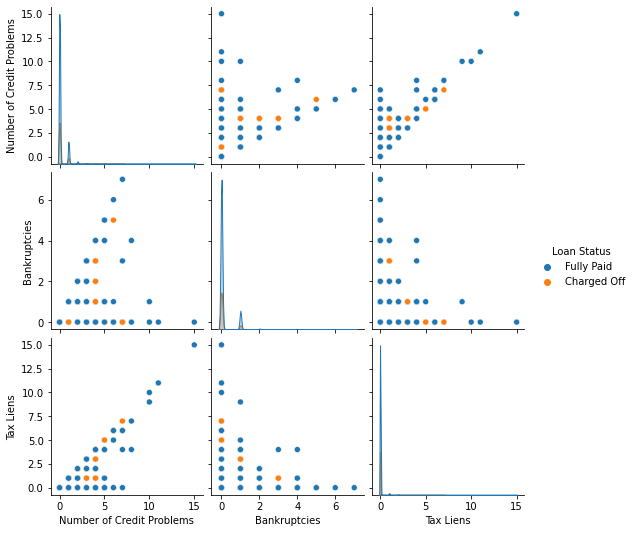

In [ ]:
sns.pairplot(data=dfRiscoLimpo, hue='Loan Status')

In [ ]:
X = dfRiscoLimpo[features[:3]]
y = dfRiscoLimpo[features[3:]]
X.head()

,Number of Credit Problems,Bankruptcies,Tax Liens
0,1.0,1.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [ ]:
#Dividir dados de treinamento e teste
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

print(len(x_train),len(x_test))

31157 7790


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(x_train,y_train)

In [ ]:
predicao = nb.predict(x_test)

In [ ]:
acuracia = metrics.accuracy_score(predicao,y_test)

In [ ]:
comparaClassificadores = pd.DataFrame([['Naive Bayes',acuracia,]],columns=['Classificador', 'Acurácia'])

print('A acurácia do naive bayes foi: ',acuracia)

A acurácia do naive bayes foi:  0.7717586649550706


In [ ]:
#Arvorte de decisão
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
predicao = dtc.predict(x_test)

In [ ]:
acuracia = metrics.accuracy_score(predicao,y_test)

In [ ]:
comparaClassificadores.append(pd.DataFrame([['DecisionTreeClassifier',acuracia]]))

,0,1,Acurácia,Classificador
0,NaN,NaN,0.771759,Naive Bayes
0,DecisionTreeClassifier,0.771887,NaN,NaN


In [ ]:
print('A acurácia do DecisionTreeClassifier foi: ',metrics.accuracy_score(predicao,y_test))

A acurácia do DecisionTreeClassifier foi:  0.7718870346598203


In [ ]:
#SVM
from sklearn import svm
svc = svm.SVC()

In [ ]:
svc.fit(x_train,y_train)

In [ ]:
predicao = svc.predict(x_test)

In [ ]:
acuracia = metrics.accuracy_score(predicao,y_test)

In [ ]:
comparaClassificadores.append([['SVC',acuracia]])

print('A acurácia do SVC foi: ',metrics.accuracy_score(predicao,y_test))

A acurácia do SVC foi:  0.7718870346598203


In [ ]:
comparaClassificadores

,Classificador,Acurácia
0,Naive Bayes,0.771759


In [ ]:
dfRiscoLimpo[:3]

,Number of Credit Problems,Bankruptcies,Tax Liens,Loan Status
0,1.0,1.0,0.0,Fully Paid
1,0.0,0.0,0.0,Fully Paid
2,1.0,0.0,0.0,Fully Paid


In [ ]:
parametros = [[1.0,0.0,0.0]]
print("Risco de pagamento: " + svc.predict(parametros))

['Risco de pagamento: Fully Paid']


In [ ]:
df.groupby(by='Loan Status').size()

Loan Status
Charged Off     8837
Fully Paid     30189
dtype: int64